In [2]:
#!/usr/bin/python3
# -*-coding:utf-8
'''
Created on Fri Dec 1 22:22:35 2017

@author: Ray

'''

import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import gc
import utils
import time
import sys
sys.path.append('/home/yunruili/Desktop/kkbox/py_model/xgboost/python-package')
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt


# load model

In [3]:
bst = xgb.Booster({'nthread':27})
bst.load_model('../output/model/1215_1/xgb_churn_0.model')

In [3]:
import operator
importance = bst.get_score('../output/xgb.fmap',importance_type = 'gain') # dict
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'gain'])
df['gain-mean'] = df['gain'] / df['gain'].sum()
df.sort_values(by = 'gain', inplace = True, ascending = False)
#df = df.tail(n =30)
df

,feature,gain,gain-mean
199,membership_duration-std_n5,1457.256855,0.108425
198,membership_duration-max_n1,1331.468219,0.099066
197,membership_duration-mean_n1,1040.601929,0.077424
196,membership_duration-min_n1,936.582984,0.069685
195,membership_duration-median_n1,801.185620,0.059611
194,auto_renew_total_count_n1,554.518942,0.041258
193,auto_renew_total_count_ratio_n1,481.008514,0.035789
192,days_since_the_last_subscription-max_n1,397.590564,0.029582
191,days_since_the_last_subscription-min_n1,338.213681,0.025164
190,days_since_the_last_subscription-median_n1,300.420174,0.022352


# top 200

In [6]:
new_top = df.head(n = 200).feature.tolist()

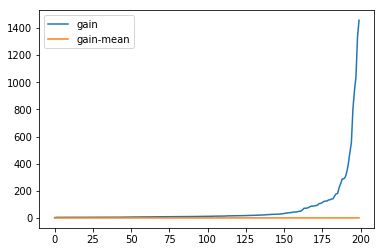

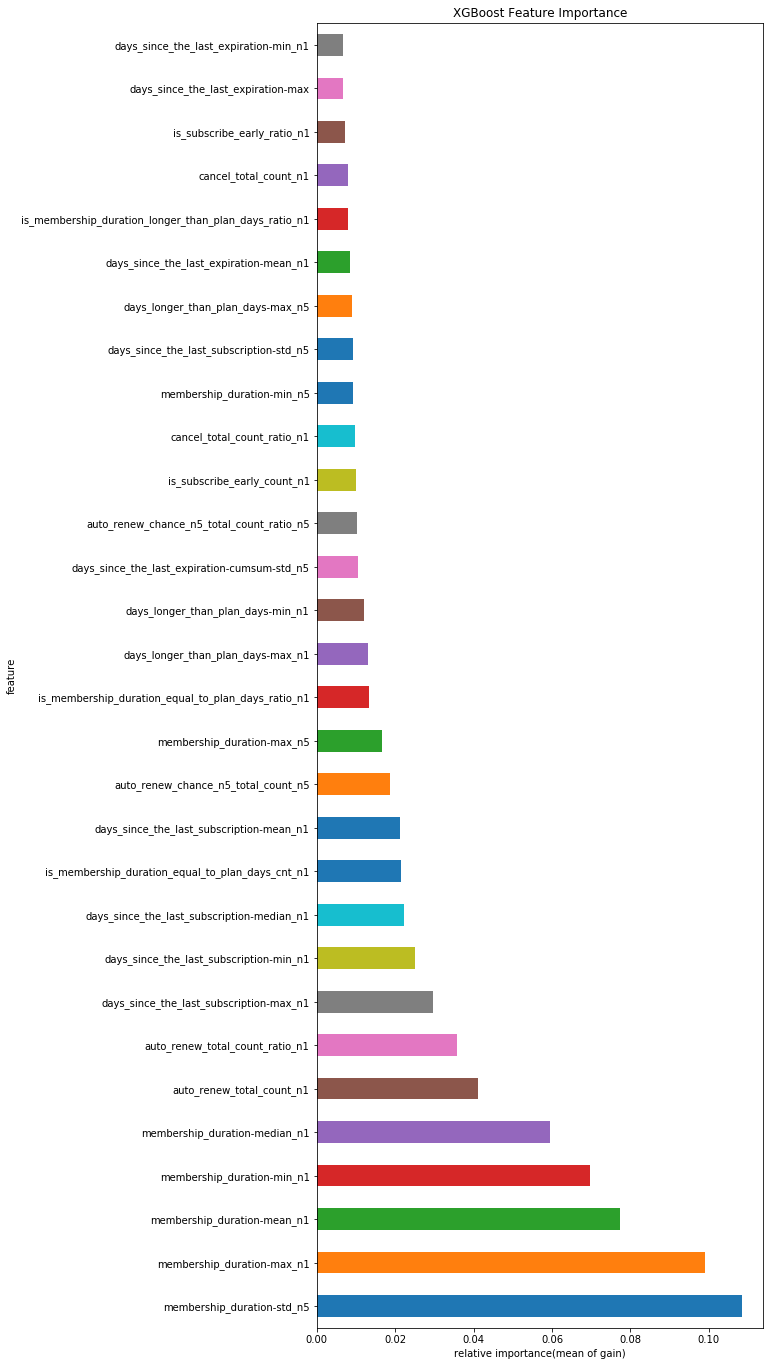

In [5]:
plt.figure()
df.plot()
df.head(n = 30).plot(kind='barh', x='feature', y='gain-mean', legend=False, figsize=(8, 24))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance(mean of gain)')
#plt.gcf().savefig('feature_importance_xgb.png')
plt.show()

In [9]:
col = ['auto_renew_total_count_n1',
 'auto_renew_total_count_ratio_n1',
 'days_since_the_last_expiration-max_n1',
 'auto_renew_chance_n5_total_count_ratio_n5',
 'cancel_total_count_ratio_n1',
 'days_since_the_last_expiration-median_n1',
 'days_since_the_last_expiration-mean_n1',
 'days_since_the_last_expiration-min_n1',
 'cancel_total_count_n1',
 'membership_duration-max_n1',
 'auto_renew_chance_n5_total_count_n5',
 'membership_duration-median_n1',
 'membership_duration-min_n1',
 'membership_duration-mean_n1',
 'days_since_the_last_subscription-median_n1',
 'days_since_the_last_subscription-max_n1',
 'days_longer_than_plan_days-max_n5',
 'days_since_the_last_subscription-mean_n1',
 'days_since_the_last_subscription-min_n1',
 'amt_per_day-median_n1',
 'auto_renew_total_count_ratio',
 'is_auto_renew_chance_n5',
 'cp_value-max_n1',
 'days_longer_than_plan_days-mean_n5',
 'days_longer_than_plan_days-median_n5',
 'cp_value-median_n1',
 'membership_duration-median_n5',
 'amt_per_day-min_n1',
 'amt_per_day-mean_n1',
 'is_subscribe_early_count_n1',
 'cp_value-min_n1',
 'is_membership_duration_equal_to_plan_days_cnt_n1',
 'cp_value-mean_n1',
 'days_since_the_last_expiration-mean_n5',
 'amt_per_day-max_n1',
 'is_membership_duration_equal_to_plan_days_ratio_n1',
 'days_since_the_first_subscription-max_n5',
 'is_subscribe_early_ratio_n1',
 'days_since_the_first_subscription-min_n1',
 'days_since_the_first_subscription-max',
 'is_cancel_chance_n5',
 'days_since_the_first_subscription-mean_n1',
 'days_since_the_first_subscription-max_n1',
 'auto_renew_total_count',
 'num_log_in_during_t_7',
 'cancel_total_count_ratio_n5',
 'membership_duration-min_n5',
 'days_since_the_last_subscription-min_n5',
 'cp_value-min',
 'membership_duration-max_n5',
 'amt_per_day-max_n5',
 'is_membership_duration_equal_to_plan_days_cnt_n5',
 'num_log_in_during_t_14',
 'days_longer_than_plan_days-median',
 'is_auto_renew_chance',
 'days_longer_than_plan_days-std_n5',
 'amt_per_day-std_n5',
 'membership_duration-mean_n5',
 'days_since_the_first_subscription-mean_n5',
 'days_since_the_first_subscription-median_n5',
 'cp_value-min_n5',
 'num_log_in_delta1_by7',
 'membership_duration-std_n5',
 'days_since_the_last_subscription_ratio-median_n5',
 'cp_value-max',
 'listen_music_in_a_row_count_during_t_7',
 'is_membership_duration_longer_than_plan_days_cnt',
 'is_membership_duration_equal_to_plan_days_cnt',
 'auto_renew_ratio_by_chance_n5',
 'membership_duration-max',
 'cp_value-median_n5',
 'is_membership_duration_equal_to_plan_days_ratio',
 'is_subscribe_early_ratio',
 'days_since_the_last_subscription-mean_n5',
 'amt_per_day-max',
 'days_since_the_last_subscription_ratio-mean_n5',
 'days_since_the_last_subscription_ratio-min_n1',
 'days_since_the_last_expiration-median_n5',
 'cp_value-mean_n5',
 'do_change_payment_method_count_n1',
 'days_since_the_first_subscription-min_n5',
 'cp_value-max_n5',
 'days_since_the_last_subscription-median_n5',
 'days_since_the_first_subscription-median_n1',
 'completed_songs_ratio_during_t_7-max',
 'listen_music_in_a_row_ratio_during_t_7',
 'days_longer_than_plan_days-mean_n1',
 'completed_songs_ratio_during_t_7-std',
 'membership_duration-median',
 'num_25_ratio_during_t_7-std',
 'discount-max_n5',
 'gender_2.0',
 'num_985-min',
 'discount-std_n5',
 'completed_songs_ratio_during_t_7-mean',
 'num_log_in_during_t_30',
 'days_since_the_last_subscription_ratio-median_n1',
 'amt_per_day-min_n5',
 'registered_via_7.0',
 'days_longer_than_plan_days-std',
 'is_early_expiration_ratio_n5',
 'days_since_the_last_subscription-max_n5',
 'membership_duration-std',
 'discount-mean_n1',
 'days_longer_than_plan_days-min_n1',
 'do_spend_more_money-min_n5',
 'days_since_the_last_subscription_ratio-max_n1',
 'listen_music_in_a_row_count_during_t_14',
 'days_since_the_last_subscription_ratio-mean_n1',
 'num_25_ratio_during_t_14-max',
 'num_100_ratio_during_t_7-mean',
 'cp_value-median',
 'discount-min_n1',
 'is_subscribe_early_count_n5',
 'days_since_the_last_subscription-std',
 'num_100_ratio_during_t_14-mean',
 'amt_per_day-mean',
 'cancel_total_count_ratio',
 'registered_via_2.0',
 'num_100_ratio_during_t_14-max',
 'completed_songs_ratio_during_t_7-min',
 'num_log_in_delta1_by60',
 'num_100_ratio_during_t_7-max',
 'days_since_the_last_expiration-cumsum-std_n5',
 'is_membership_duration_longer_than_plan_days_cnt_n5',
 'date_diff_during_t_7-min',
 'early_expiration_days-max_n1',
 'num_100_ratio_during_t_30-max',
 'transactions_count',
 'discount-max_n1',
 'is_membership_duration_longer_than_plan_days_ratio',
 'num_100_ratio_during_t_7-std',
 'amt_per_day-median_n5',
 'listen_music_in_a_row_count_during_t_30',
 'cp_value-std_n5',
 'days_since_the_last_subscription_ratio-min_n5',
 'cp_value-mean',
 'days_since_the_first_subscription-mean',
 'days_since_the_last_expiration_ratio-mean_n1',
 'days_since_the_last_expiration_ratio-median_n1',
 'days_since_the_last_expiration-cumsum-mean_n1',
 'discount-mean_n5',
 'num_25_ratio_during_t_7-max',
 'is_membership_duration_equal_to_plan_days_ratio_n5',
 'num_100_ratio_during_t_14-min',
 'days_since_the_last_expiration-median',
 'days_longer_than_plan_days-max',
 'amt_per_day-mean_n5',
 'days_since_the_last_expiration-min',
 'days_longer_than_plan_days-min_n5',
 'listen_music_in_a_row_ratio_during_t_30',
 'is_membership_duration_longer_than_plan_days_ratio_n1',
 'num_repeated_songs_during_t_7-std',
 'do_extend_payment_days-mean_n1',
 'days_since_the_last_expiration_ratio-min_n1',
 'do_spend_more_money-std_n5',
 'num_log_in_during_t_90',
 'is_early_expiration_cnt_n5',
 'days_longer_than_plan_days-max_n1',
 'discount-median_n1',
 'is_cancel_chance',
 'num_repeated_songs_during_t_7-median',
 'date_diff_during_t_90-max',
 'date_diff_during_t_7-std',
 'completed_songs_ratio_during_t_14-max',
 'days_since_the_last_subscription_ratio-min',
 'completed_songs_ratio_during_t_30-max',
 'days_since_the_last_subscription-mean',
 'days_since_the_last_subscription_ratio-std',
 'city_1.0',
 'is_discount_total_count_n5',
 'is_subscribe_early_ratio_n5',
 'membership_duration-mean',
 'days_since_the_last_subscription-std_n5',
 'do_extend_payment_days-std',
 'is_discount_total_count_ratio_n5',
 'listen_music_in_a_row_ratio_during_t_14',
 'city_21.0',
 'is_membership_duration_longer_than_plan_days_ratio_n5',
 'do_extend_payment_days-max_n1',
 'date_diff_during_t_7-mean',
 'days_longer_than_plan_days-mean',
 'num_repeated_songs_during_t_7-max',
 'days_since_the_last_expiration-cumsum-max_n1',
 'num_repeated_songs_during_t_7-mean',
 'days_since_the_last_subscription_ratio-median',
 'do_extend_payment_days-std_n5',
 'num_100_ratio_during_t_7-min',
 'days_since_the_last_expiration-max',
 'do_extend_payment_days-min',
 'bd',
 'completed_songs_ratio_during_t_7-median',
 'date_diff_delta2_by7',
 'days_since_the_first_subscription-std',
 'date_diff_during_t_90-std',
 'do_extend_payment_days-min_n1',
 'num_log_in_delta2_by7',
 'num_log_in_during_t_60',
 'days_since_the_last_expiration-cumsum-median_n5',
 'city_7.0']

In [10]:
len(col)

200

In [11]:
for i in range(1,6,2):
    print (i)


1
3
5


In [12]:
for c in col:
    if c not in new_top:
        print (c)